<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
        Project - 3rd Phase
        <br />
        Image Colorization using Autoencoder
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99102531
            <br />
            Name = Amir Mohammad   
            <br />
            Last_Name = Yousefi 
        </div>
        <div class="column">
        <br />
            student_number = 99102394
            <br />
            Name = Seyed Mohsen   
            <br />
            Last_Name = Nasiri 
        </div>
    </font>
    </div>


1. Download the "landscape image colorization" dataset and slice it to `train_set`, `validation_set` and `test_set`.
2. Design and train an AutoEncoder using `PyTorch` (not `TensorFlow`) on the dataset to colorize grayscale images
3. plot learning curve and visualize grayscale images of test set, their corresponding color images and their colorized versions side by side.

# Import Necessary Libraries

In [1]:
import pandas as pd 
import os
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from matplotlib import pyplot as plt
from typing import Dict
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

# Load Dataset and Prepare It

In [2]:
folder_path = 'C:/Users/smnas/landscape Images'
color_folder = os.path.join(folder_path, 'color')
gray_folder = os.path.join(folder_path, 'gray')

In [3]:
data = []
for filename in os.listdir(color_folder):
    path_1 = os.path.join(color_folder, filename)
    path_2 = os.path.join(gray_folder, filename)
    data.append({"color": path_1, "gray": path_2})
df = pd.DataFrame(data)
df.head()

,color,gray
0,C:/Users/smnas/landscape Images\color\0.jpg,C:/Users/smnas/landscape Images\gray\0.jpg
1,C:/Users/smnas/landscape Images\color\1.jpg,C:/Users/smnas/landscape Images\gray\1.jpg
2,C:/Users/smnas/landscape Images\color\10.jpg,C:/Users/smnas/landscape Images\gray\10.jpg
3,C:/Users/smnas/landscape Images\color\100.jpg,C:/Users/smnas/landscape Images\gray\100.jpg
4,C:/Users/smnas/landscape Images\color\1000.jpg,C:/Users/smnas/landscape Images\gray\1000.jpg


In [4]:
train_df, test_df = train_test_split(df, test_size=0.3)
color_ARRAY_LIST = []
gray_ARRAY_LIST = []

In [5]:
for x_color,x_gray in zip(train_df.color,train_df.gray):
    
    READING_color = cv2.cvtColor(cv2.imread(x_color),cv2.COLOR_BGR2RGB)
    READING_gray = cv2.cvtColor(cv2.imread(x_gray),cv2.COLOR_BGR2RGB)
    
    RESIZED_color = cv2.resize(READING_color,(150,150))
    RESIZED_gray = cv2.resize(READING_gray,(150,150))
    
    FLOAT_color = RESIZED_color.astype(np.float32) / 255.
    FLOAT_gray = RESIZED_gray.astype(np.float32) / 255.
    
    color_ARRAY_LIST.append(np.transpose(img_to_array(FLOAT_color), (2, 0, 1)))
    gray_ARRAY_LIST.append(np.transpose(img_to_array(FLOAT_gray), (2, 0, 1)))

In [6]:
color_FIT_DATA = np.array(color_ARRAY_LIST)
gray_FIT_DATA = np.array(gray_ARRAY_LIST)

In [7]:
train_data = TensorDataset(torch.Tensor(gray_FIT_DATA), torch.Tensor(color_FIT_DATA))
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)

In [8]:
color_ARRAY_LIST = []
gray_ARRAY_LIST = []

In [9]:
for x_color,x_gray in zip(test_df.color,test_df.gray):
    
    READING_color = cv2.cvtColor(cv2.imread(x_color),cv2.COLOR_BGR2RGB)
    READING_gray = cv2.cvtColor(cv2.imread(x_gray),cv2.COLOR_BGR2RGB)
    
    RESIZED_color = cv2.resize(READING_color,(150,150))
    RESIZED_gray = cv2.resize(READING_gray,(150,150))
    
    FLOAT_color = RESIZED_color.astype(np.float32) / 255.
    FLOAT_gray = RESIZED_gray.astype(np.float32) / 255.
    
    color_ARRAY_LIST.append(np.transpose(img_to_array(FLOAT_color), (2, 0, 1)))
    gray_ARRAY_LIST.append(np.transpose(img_to_array(FLOAT_gray), (2, 0, 1)))

In [10]:
color_FIT_DATA = np.array(color_ARRAY_LIST)
gray_FIT_DATA = np.array(gray_ARRAY_LIST)

In [11]:
test_data = TensorDataset(torch.Tensor(gray_FIT_DATA), torch.Tensor(color_FIT_DATA))
test_loader = DataLoader(test_data, batch_size=4, shuffle=True)

# Define Your Model

In [12]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding='same'),
            nn.ReLU(),
            #nn.MaxPool2d(2),
            #nn.Dropout(0.3),
            nn.Conv2d(64, 128, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding='same'),
            nn.ReLU(),
            #nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding='same'),
        )
         
        self.decoder = nn.Sequential(
            #nn.Upsample(scale_factor=2),
            nn.Conv2d(256, 128, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding='same'),
            nn.ReLU(),
            #nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(64, 3, 3, padding='same'),
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = Autoencoder()

# Fit The Model

Also Define optimizer, Criterion and other parameters 

In [13]:
criterion = nn.MSELoss()

optimizer = optim.Adam(autoencoder.parameters())

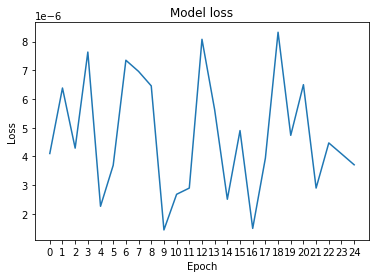

In [14]:
epoch_nums = 25
losses = []
    
for epoch in range(epoch_nums):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
       
        inputs_gray, out_color = data
       
        reconstructed = autoencoder(inputs_gray)
       
        loss = criterion(reconstructed, out_color)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss =+ loss.item()
    losses.append(running_loss / i)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.xticks(range(epoch_nums))
plt.show()

# Plot The Results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


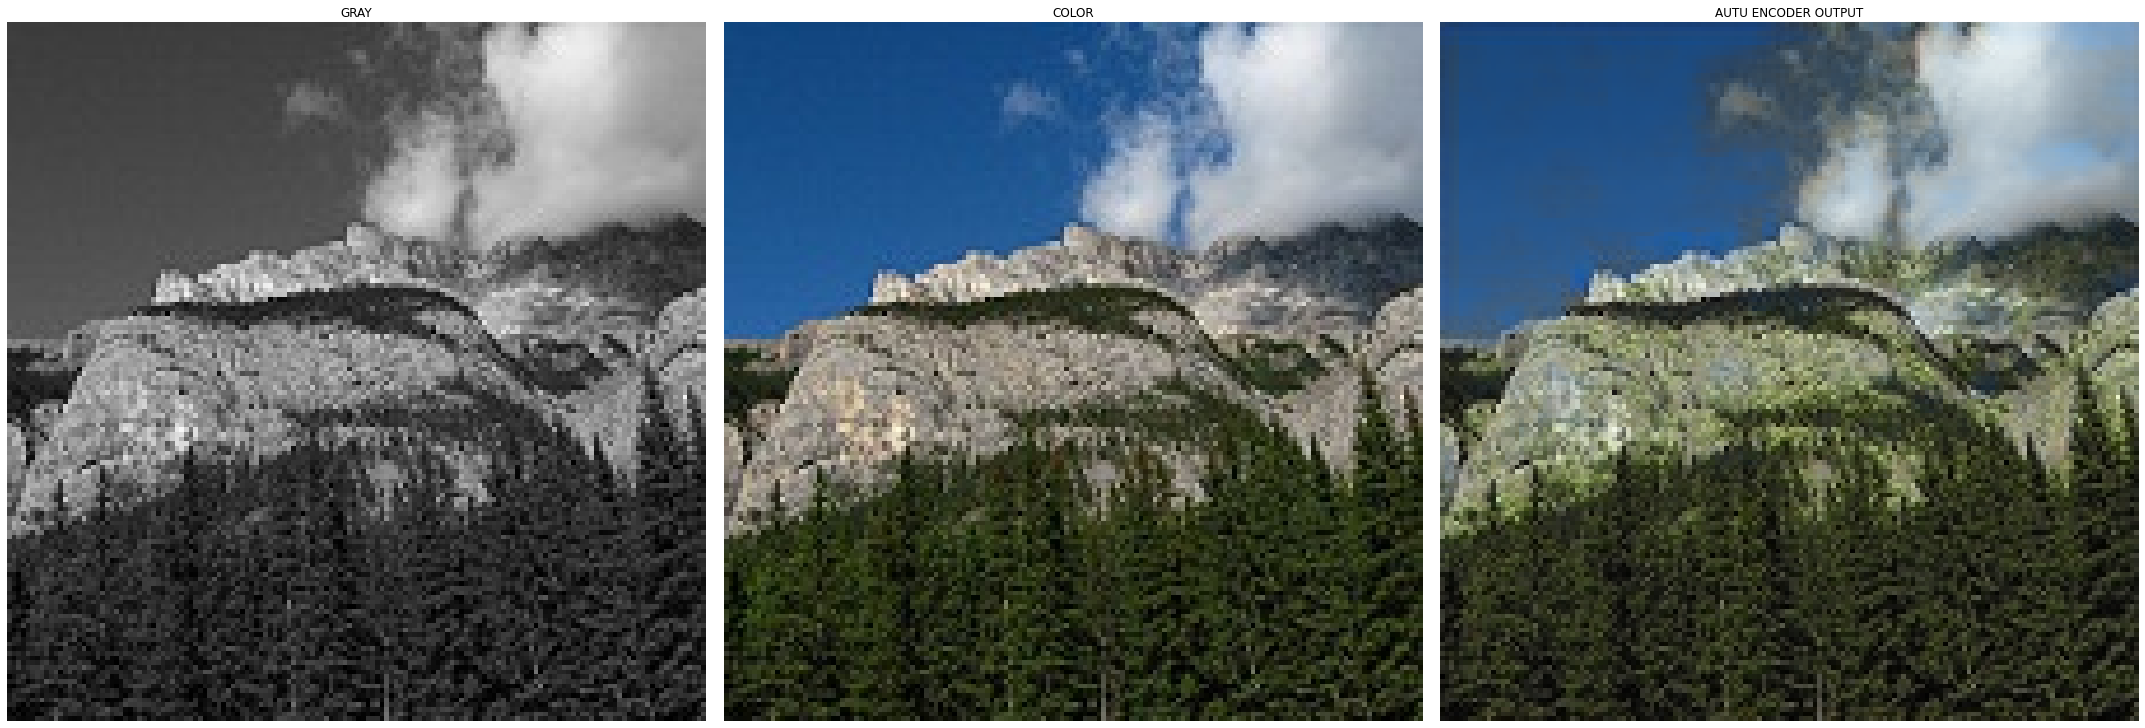

In [56]:
inputs_gray, out_color = next(iter(test_loader))
output = autoencoder(inputs_gray[0])
        
fig, axs = plt.subplots(1 , 3, figsize=(30,10))
axs[0].imshow(np.transpose(inputs_gray[0], (1, 2, 0)))
axs[0].set_title('GRAY')
axs[0].axis('off')
axs[1].imshow(np.transpose(out_color[0], (1, 2, 0)))
axs[1].set_title('COLOR')
axs[1].axis('off')
axs[2].imshow(np.transpose(output.clone().detach(), (1, 2, 0)))
axs[2].set_title('AUTU ENCODER OUTPUT')
axs[2].axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


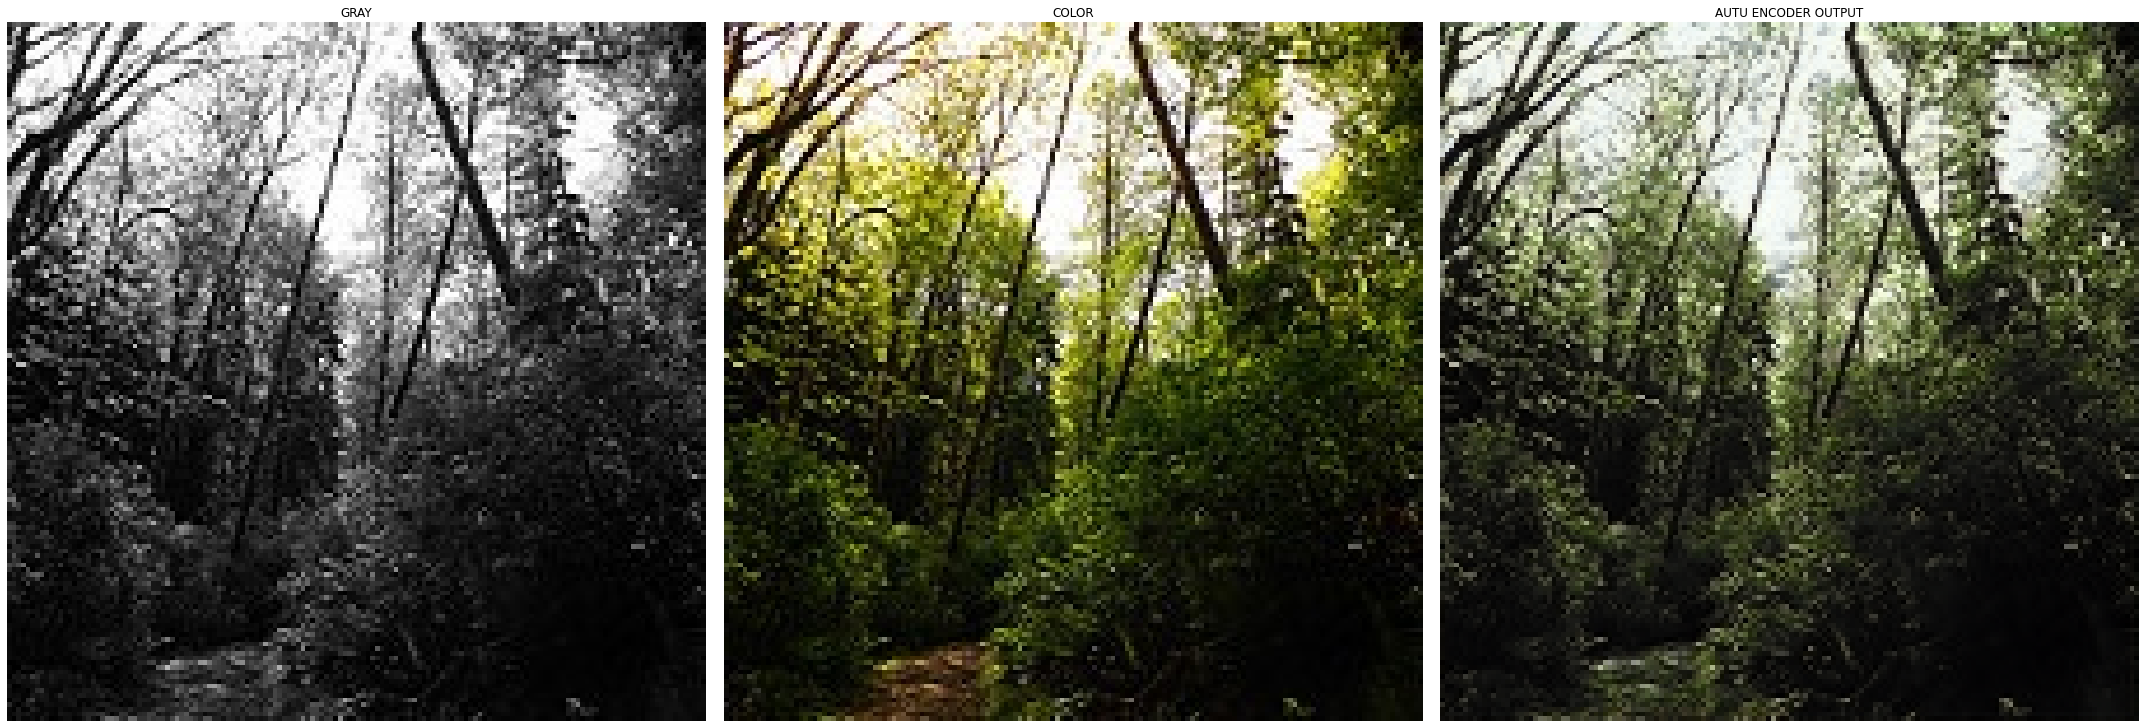

In [58]:
inputs_gray, out_color = next(iter(test_loader))
output = autoencoder(inputs_gray[0])
        
fig, axs = plt.subplots(1 , 3, figsize=(30,10))
axs[0].imshow(np.transpose(inputs_gray[0], (1, 2, 0)))
axs[0].set_title('GRAY')
axs[0].axis('off')
axs[1].imshow(np.transpose(out_color[0], (1, 2, 0)))
axs[1].set_title('COLOR')
axs[1].axis('off')
axs[2].imshow(np.transpose(output.clone().detach(), (1, 2, 0)))
axs[2].set_title('AUTU ENCODER OUTPUT')
axs[2].axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


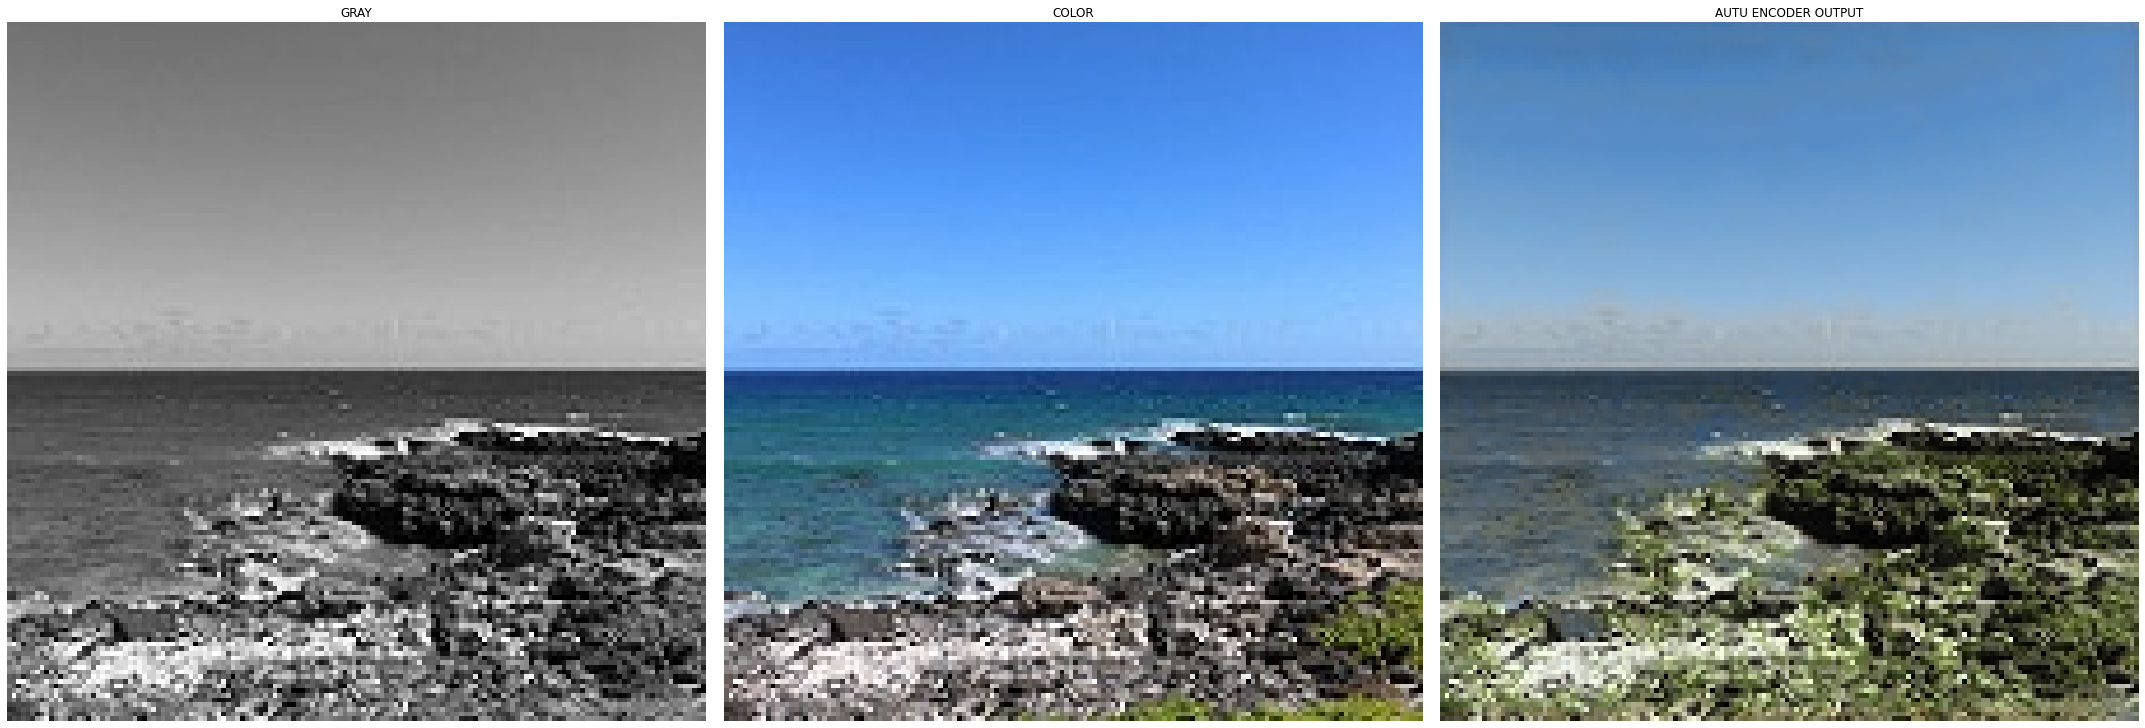

In [67]:
inputs_gray, out_color = next(iter(test_loader))
output = autoencoder(inputs_gray[0])
        
fig, axs = plt.subplots(1 , 3, figsize=(30,10))
axs[0].imshow(np.transpose(inputs_gray[0], (1, 2, 0)))
axs[0].set_title('GRAY')
axs[0].axis('off')
axs[1].imshow(np.transpose(out_color[0], (1, 2, 0)))
axs[1].set_title('COLOR')
axs[1].axis('off')
axs[2].imshow(np.transpose(output.clone().detach(), (1, 2, 0)))
axs[2].set_title('AUTU ENCODER OUTPUT')
axs[2].axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


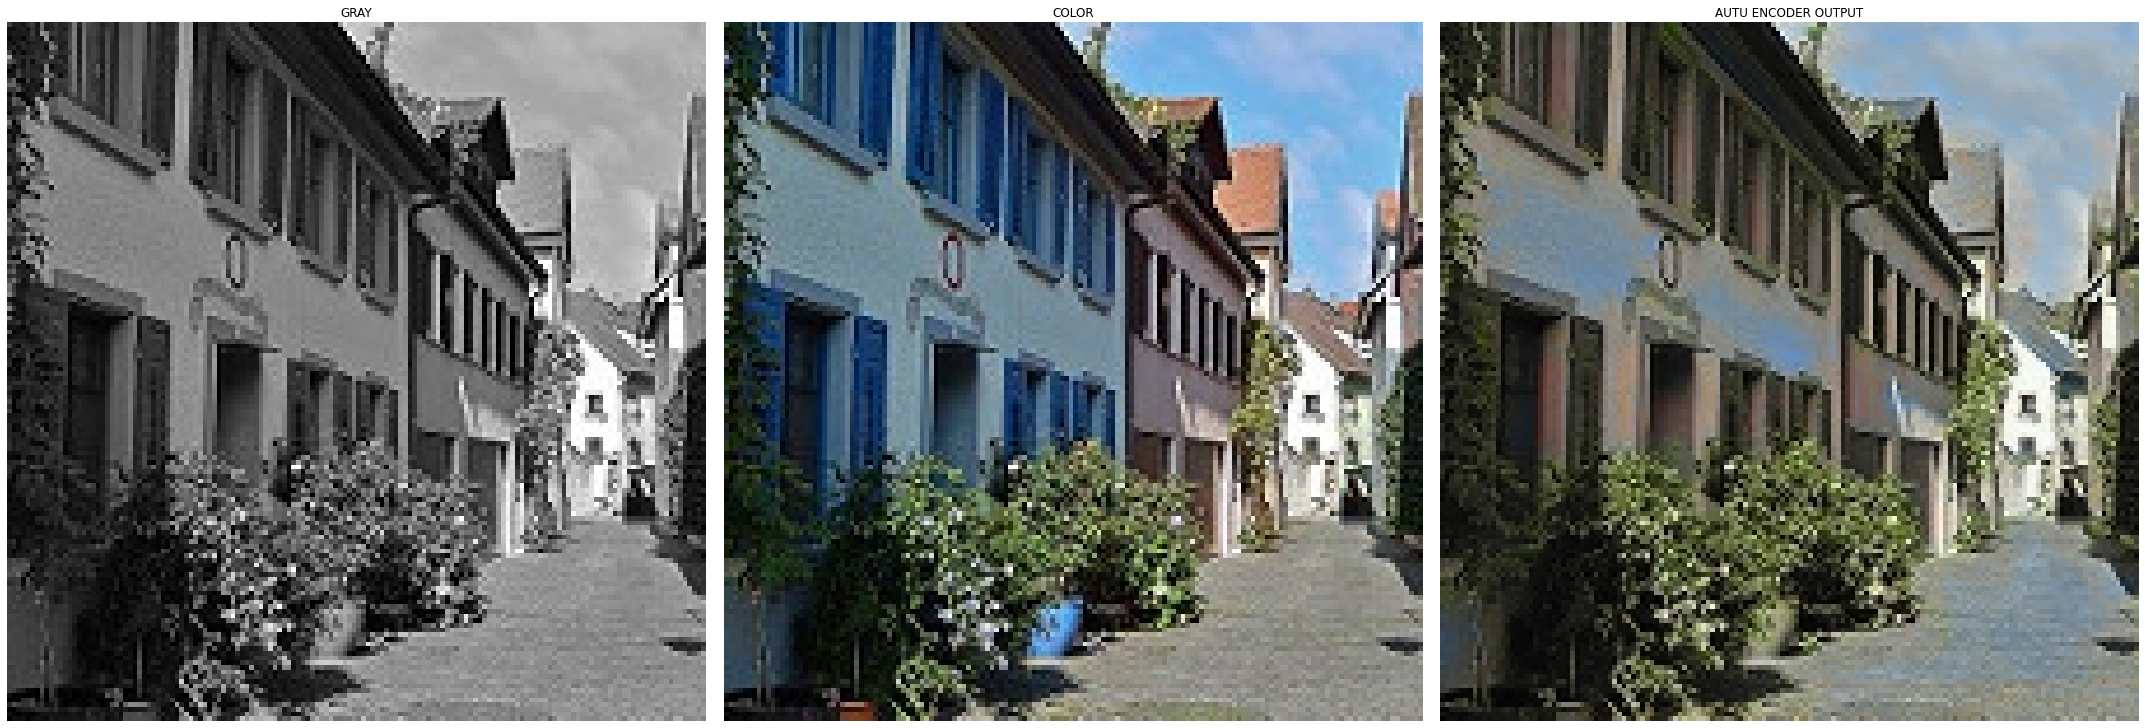

In [68]:
inputs_gray, out_color = next(iter(test_loader))
output = autoencoder(inputs_gray[0])
        
fig, axs = plt.subplots(1 , 3, figsize=(30,10))
axs[0].imshow(np.transpose(inputs_gray[0], (1, 2, 0)))
axs[0].set_title('GRAY')
axs[0].axis('off')
axs[1].imshow(np.transpose(out_color[0], (1, 2, 0)))
axs[1].set_title('COLOR')
axs[1].axis('off')
axs[2].imshow(np.transpose(output.clone().detach(), (1, 2, 0)))
axs[2].set_title('AUTU ENCODER OUTPUT')
axs[2].axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


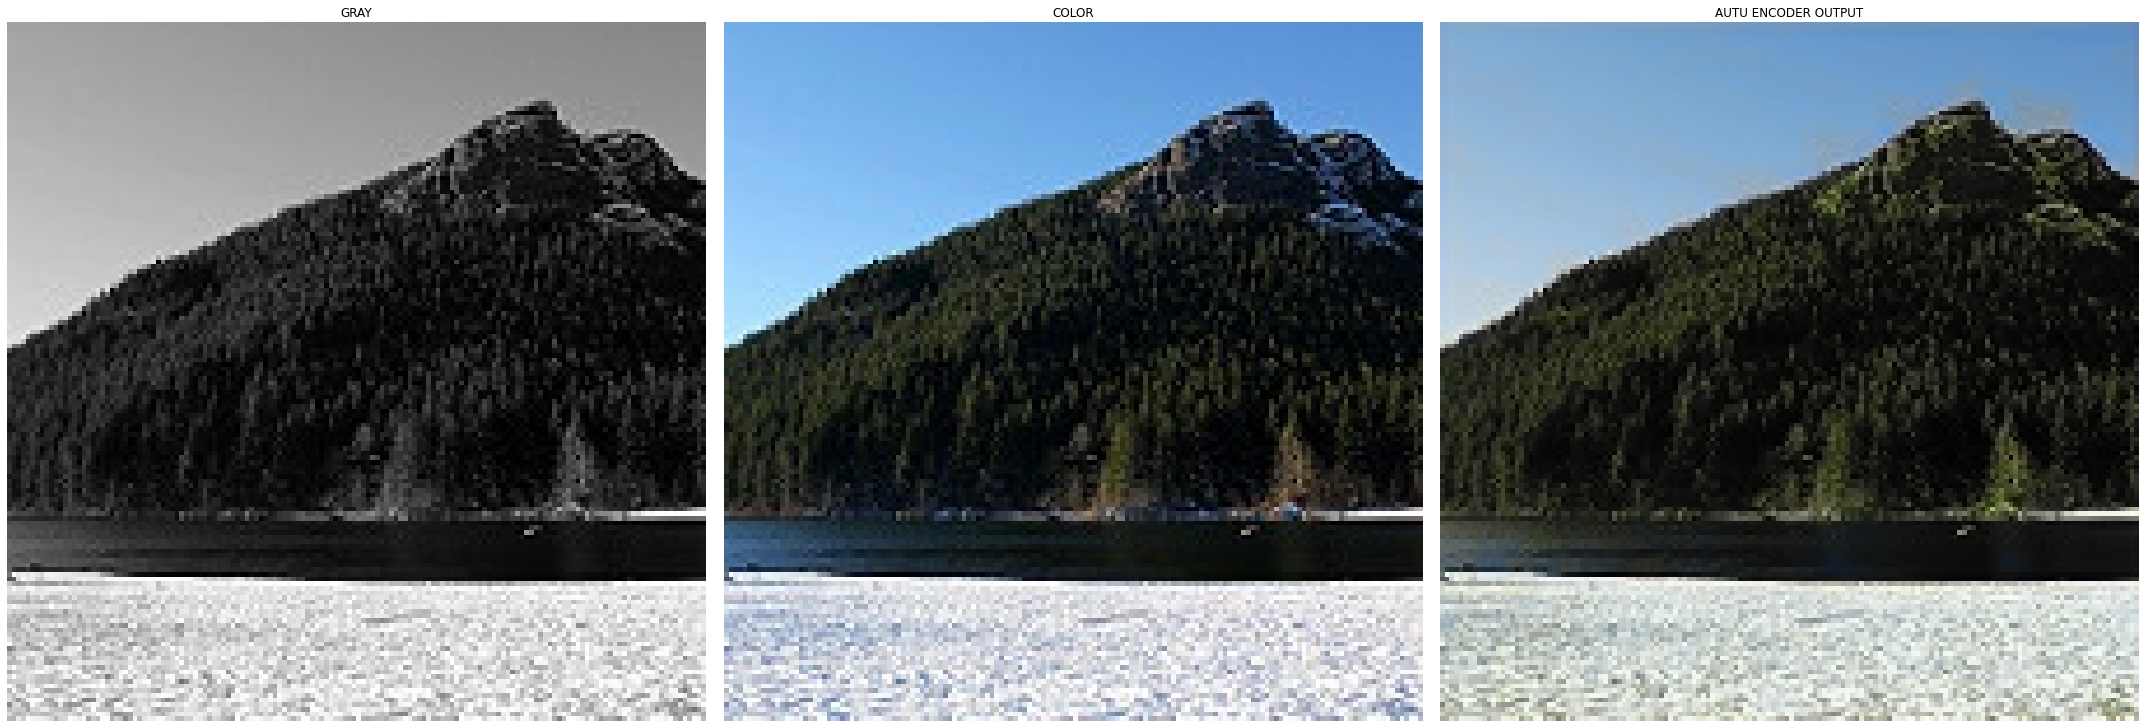

In [69]:
inputs_gray, out_color = next(iter(test_loader))
output = autoencoder(inputs_gray[0])
        
fig, axs = plt.subplots(1 , 3, figsize=(30,10))
axs[0].imshow(np.transpose(inputs_gray[0], (1, 2, 0)))
axs[0].set_title('GRAY')
axs[0].axis('off')
axs[1].imshow(np.transpose(out_color[0], (1, 2, 0)))
axs[1].set_title('COLOR')
axs[1].axis('off')
axs[2].imshow(np.transpose(output.clone().detach(), (1, 2, 0)))
axs[2].set_title('AUTU ENCODER OUTPUT')
axs[2].axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


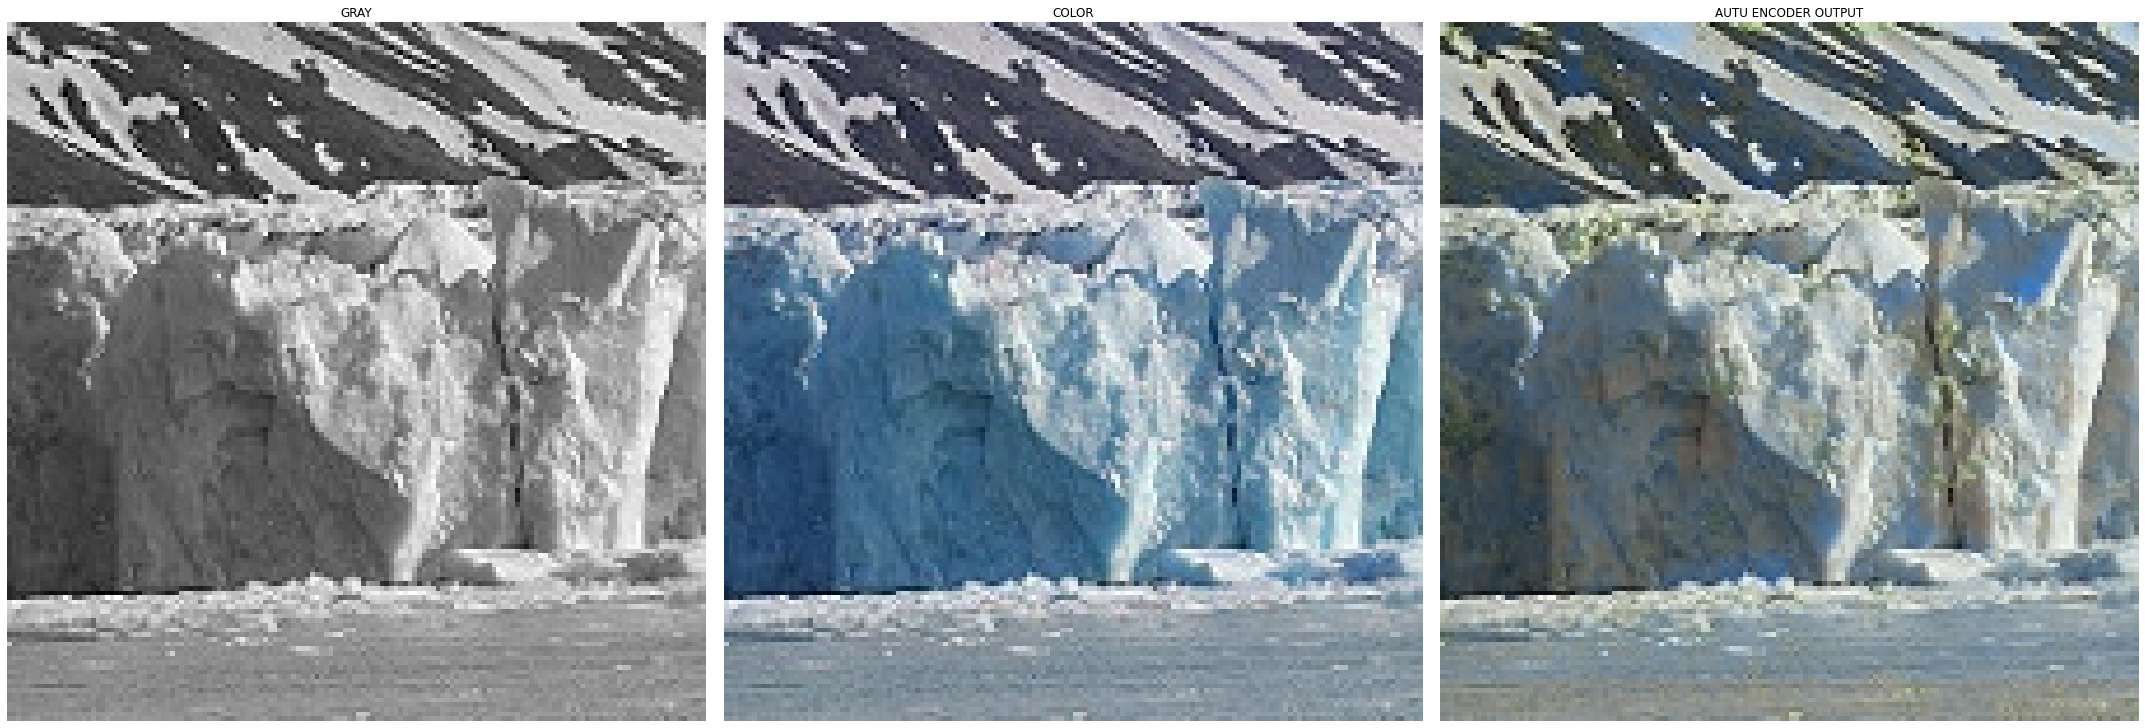

In [137]:
inputs_gray, out_color = next(iter(test_loader))
output = autoencoder(inputs_gray[0])
        
fig, axs = plt.subplots(1 , 3, figsize=(30,10))
axs[0].imshow(np.transpose(inputs_gray[0], (1, 2, 0)))
axs[0].set_title('GRAY')
axs[0].axis('off')
axs[1].imshow(np.transpose(out_color[0], (1, 2, 0)))
axs[1].set_title('COLOR')
axs[1].axis('off')
axs[2].imshow(np.transpose(output.clone().detach(), (1, 2, 0)))
axs[2].set_title('AUTU ENCODER OUTPUT')
axs[2].axis('off')

plt.tight_layout()
plt.show()